In [197]:
import pandas as pd

import kagglehub

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_score, davies_bouldin_score



In [198]:

# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [199]:
# Selecting only numerical features

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [200]:
# Standardize the data

X_scaled = StandardScaler().fit_transform(X)

In [201]:
silhouette_scores = []

for k in range(2, 11):  # Silhouette is not defined for K=1

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels)

    silhouette_scores.append(score)


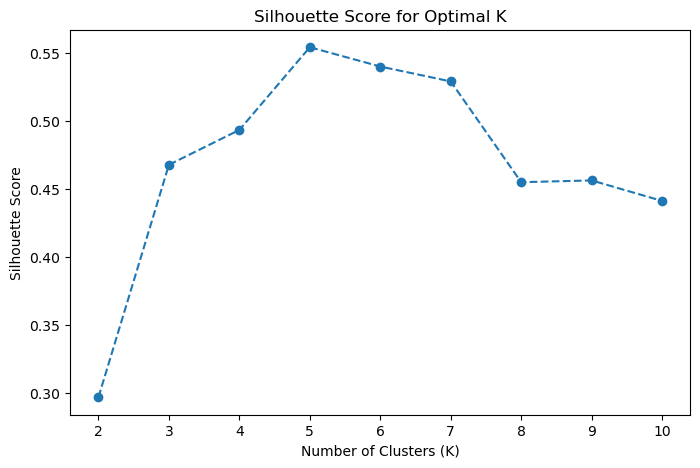

In [202]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')

plt.xlabel("Number of Clusters (K)")

plt.ylabel("Silhouette Score")

plt.title("Silhouette Score for Optimal K")

plt.show()

In [203]:
# Define a range of values for tuning
eps_values = [0.2, 0.5, 0.8, 1.0]
min_samples_values = [3, 5, 10]

best_sil_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Exclude noise (-1) before computing silhouette score
        mask = labels != -1
        if len(set(labels[mask])) > 1:  # Avoid computing on a single cluster
            sil_score = silhouette_score(X_scaled[mask], labels[mask])
            dbi_score = davies_bouldin_score(X_scaled[mask], labels[mask])

            print(f"eps: {eps}, min_samples: {min_samples} → Silhouette Score: {sil_score:.4f}, DBI: {dbi_score:.4f}")

            # Track best parameters
            if sil_score > best_sil_score:
                best_sil_score = sil_score
                best_params = (eps, min_samples)

print(f"\nBest Parameters: eps={best_params[0]}, min_samples={best_params[1]} with Silhouette Score {best_sil_score:.4f}")

eps: 0.2, min_samples: 3 → Silhouette Score: 0.4697, DBI: 0.5704
eps: 0.2, min_samples: 5 → Silhouette Score: 0.5856, DBI: 0.4637
eps: 0.5, min_samples: 3 → Silhouette Score: 0.3892, DBI: 0.7962
eps: 0.5, min_samples: 5 → Silhouette Score: 0.3876, DBI: 0.7889
eps: 0.5, min_samples: 10 → Silhouette Score: 0.5107, DBI: 0.5868

Best Parameters: eps=0.2, min_samples=5 with Silhouette Score 0.5856


In [204]:
best_eps ,best_min_samples = 0.2, 5

dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)

labels_optimized = dbscan_optimized.fit_predict(X_scaled)

In [205]:
optimal_k = 5

# Run K-Means Clustering

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

labels_kmeans = kmeans.fit_predict(X_scaled)


In [206]:
# Run Hierarchical Clustering (Agglomerative)

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)

labels_hierarchical = hierarchical.fit_predict(X_scaled)

In [207]:
# Scores for DBSCAN

silhouette_dbscan = silhouette_score(X_scaled, labels_optimized) if len(set(labels_optimized)) > 1 else -1

db_index_dbscan = davies_bouldin_score(X_scaled, labels_optimized) if len(set(labels_optimized)) > 1 else -1

In [208]:
# Scores for K-Means

silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)

db_index_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

In [209]:
# Scores for Hierarchical Clustering

silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)

db_index_hierarchical = davies_bouldin_score(X_scaled, labels_hierarchical)

In [210]:
# Print results
print(f"Silhouette Scores: DBSCAN = {silhouette_dbscan:.4f}, K-Means = {silhouette_kmeans:.4f}, Hierarchical = {silhouette_hierarchical:.4f}\n")

print(f"Davies-Bouldin Index: DBSCAN = {db_index_dbscan:.4f}, K-Means = {db_index_kmeans:.4f}, Hierarchical = {db_index_hierarchical:.4f}")

Silhouette Scores: DBSCAN = 0.1406, K-Means = 0.5547, Hierarchical = 0.5538

Davies-Bouldin Index: DBSCAN = 2.8890, K-Means = 0.5722, Hierarchical = 0.5779


✅ Interpretation:

Higher Silhouette Score = Better cluster separation

Lower Davies-Bouldin Index = Better clustering (lower intra-cluster variance)

2️⃣ Visualizing Clusters with PCA & t-SNE

We will now visualize all clustering results.

In [211]:
# Reduce dimensions to 2D using PCA

X_pca = PCA(n_components=2).fit_transform(X_scaled)

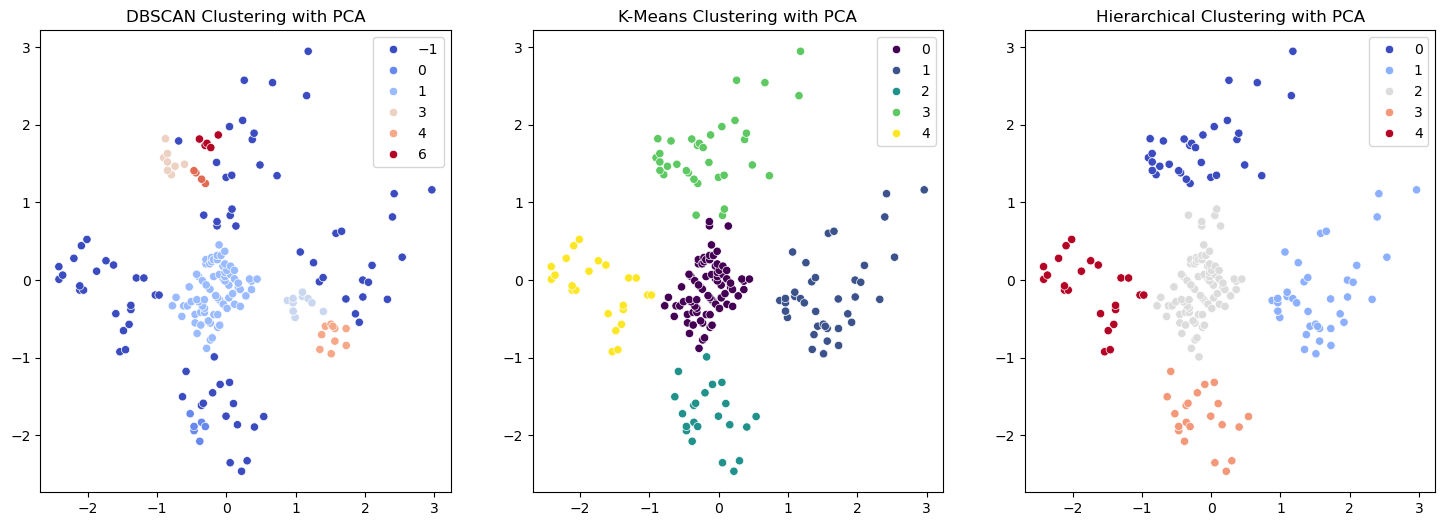

In [212]:
# Plot Clustering Results

fig,axes = plt.subplots(1,3, figsize=(18,6))

# DBSCAN

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1], hue=labels_optimized, ax=axes[0], palette='coolwarm' )

axes[0].set_title("DBSCAN Clustering with PCA")

# K-Means

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, ax=axes[1], palette="viridis")

axes[1].set_title("K-Means Clustering with PCA")

# Hierarchical

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_hierarchical, ax=axes[2], palette="coolwarm")

axes[2].set_title("Hierarchical Clustering with PCA")

plt.show()


 t-SNE Visualization

In [213]:
# Reduce dimensions to 2D using t-SNE

X_tsne =TSNE(n_components=2, perplexity=30,random_state=42).fit_transform(X_scaled)

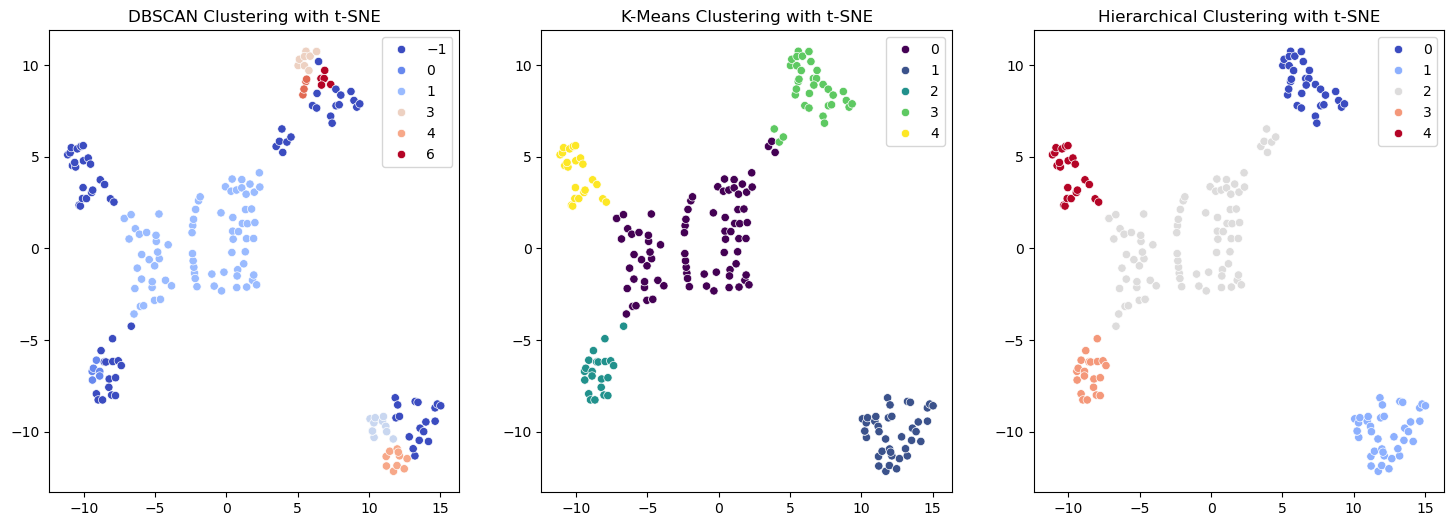

In [214]:
# Plot Clustering Results

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# DBSCAN

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_optimized, ax=axes[0], palette="coolwarm")

axes[0].set_title("DBSCAN Clustering with t-SNE")

# K-Means

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_kmeans, ax=axes[1], palette="viridis")

axes[1].set_title("K-Means Clustering with t-SNE")

# Hierarchical

sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_hierarchical, ax=axes[2], palette="coolwarm")

axes[2].set_title("Hierarchical Clustering with t-SNE")

plt.show()

3️⃣ Key Observations & When to Use Each

Algorithm	          Best For	                                       Strengths	                            Weaknesses
DBSCAN	              Anomaly detection, irregular clusters	           Handles noise, arbitrary shape clusters	Fails in high-dimensional, varying-density data
K-Means	              Compact, spherical clusters	                   Fast, scalable	                        Assumes fixed number of clusters (k)
Hierarchical	      Small datasets with hierarchical relationships   No need to predefine k	                Computationally expensive 